In [24]:
# First import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
# To remove warnings

import warnings
warnings.filterwarnings("ignore")

In [26]:
# Read the data

df = pd.read_csv("/content/wine.csv")
df


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [27]:
# display first 5 rows

df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
# display last 5 rows

df.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [29]:
# display the columns

df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [30]:
# Statistical information of the data

df.describe()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [31]:
# information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [32]:
# Skewness of the data

df.skew()

Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

In [33]:
# Kurtosis of the data

df.kurt()

Type              -1.322787
Alcohol           -0.852500
Malic              0.299207
Ash                1.143978
Alcalinity         0.487942
Magnesium          2.104991
Phenols           -0.835627
Flavanoids        -0.880382
Nonflavanoids     -0.637191
Proanthocyanins    0.554649
Color              0.381522
Hue               -0.344096
Dilution          -1.086435
Proline           -0.248403
dtype: float64

In [34]:
# for missing values

df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [35]:
# Correlation

df.corr()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [36]:
# no of rows and columns

df.shape


(178, 14)

In [37]:
# maintain the copies of the data set for the purpose of Clustering

data1 = df.copy()
data2 = df.copy()

In [38]:
# for the independent variable

x = df.iloc[:,1:14]


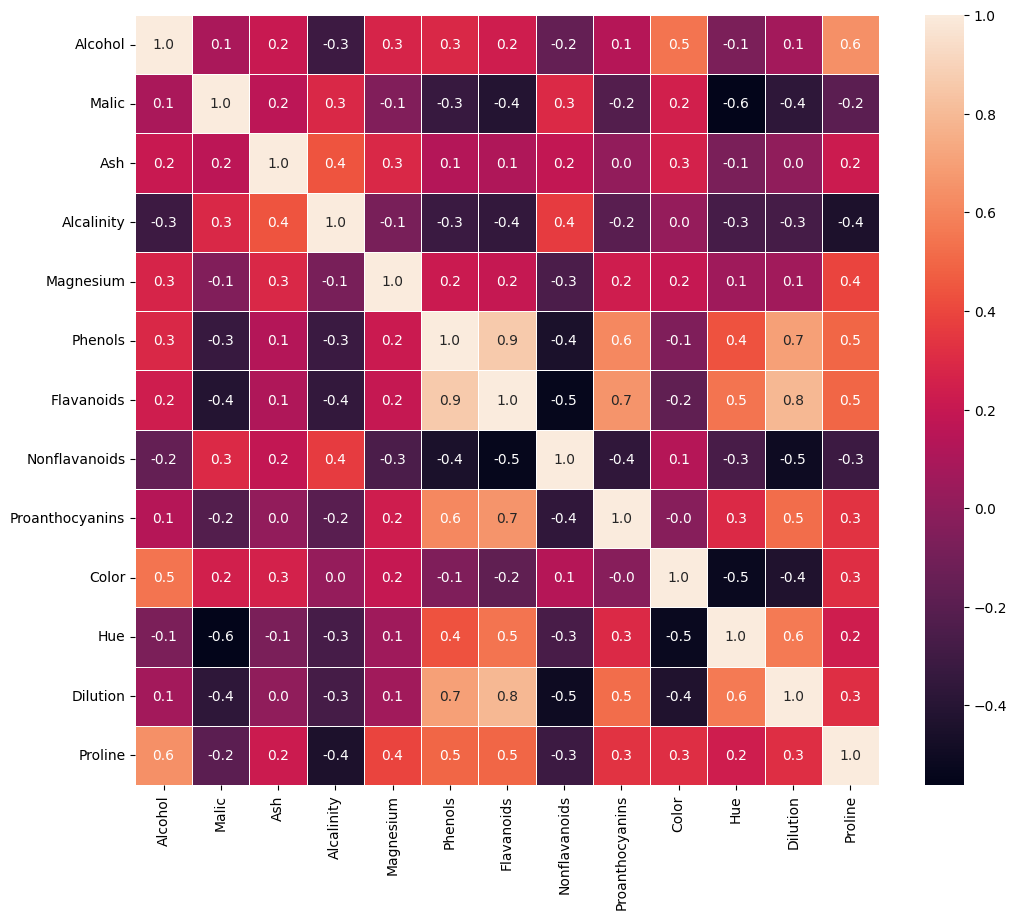

In [39]:
# visualizations

# to display the heatmap

f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(x.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

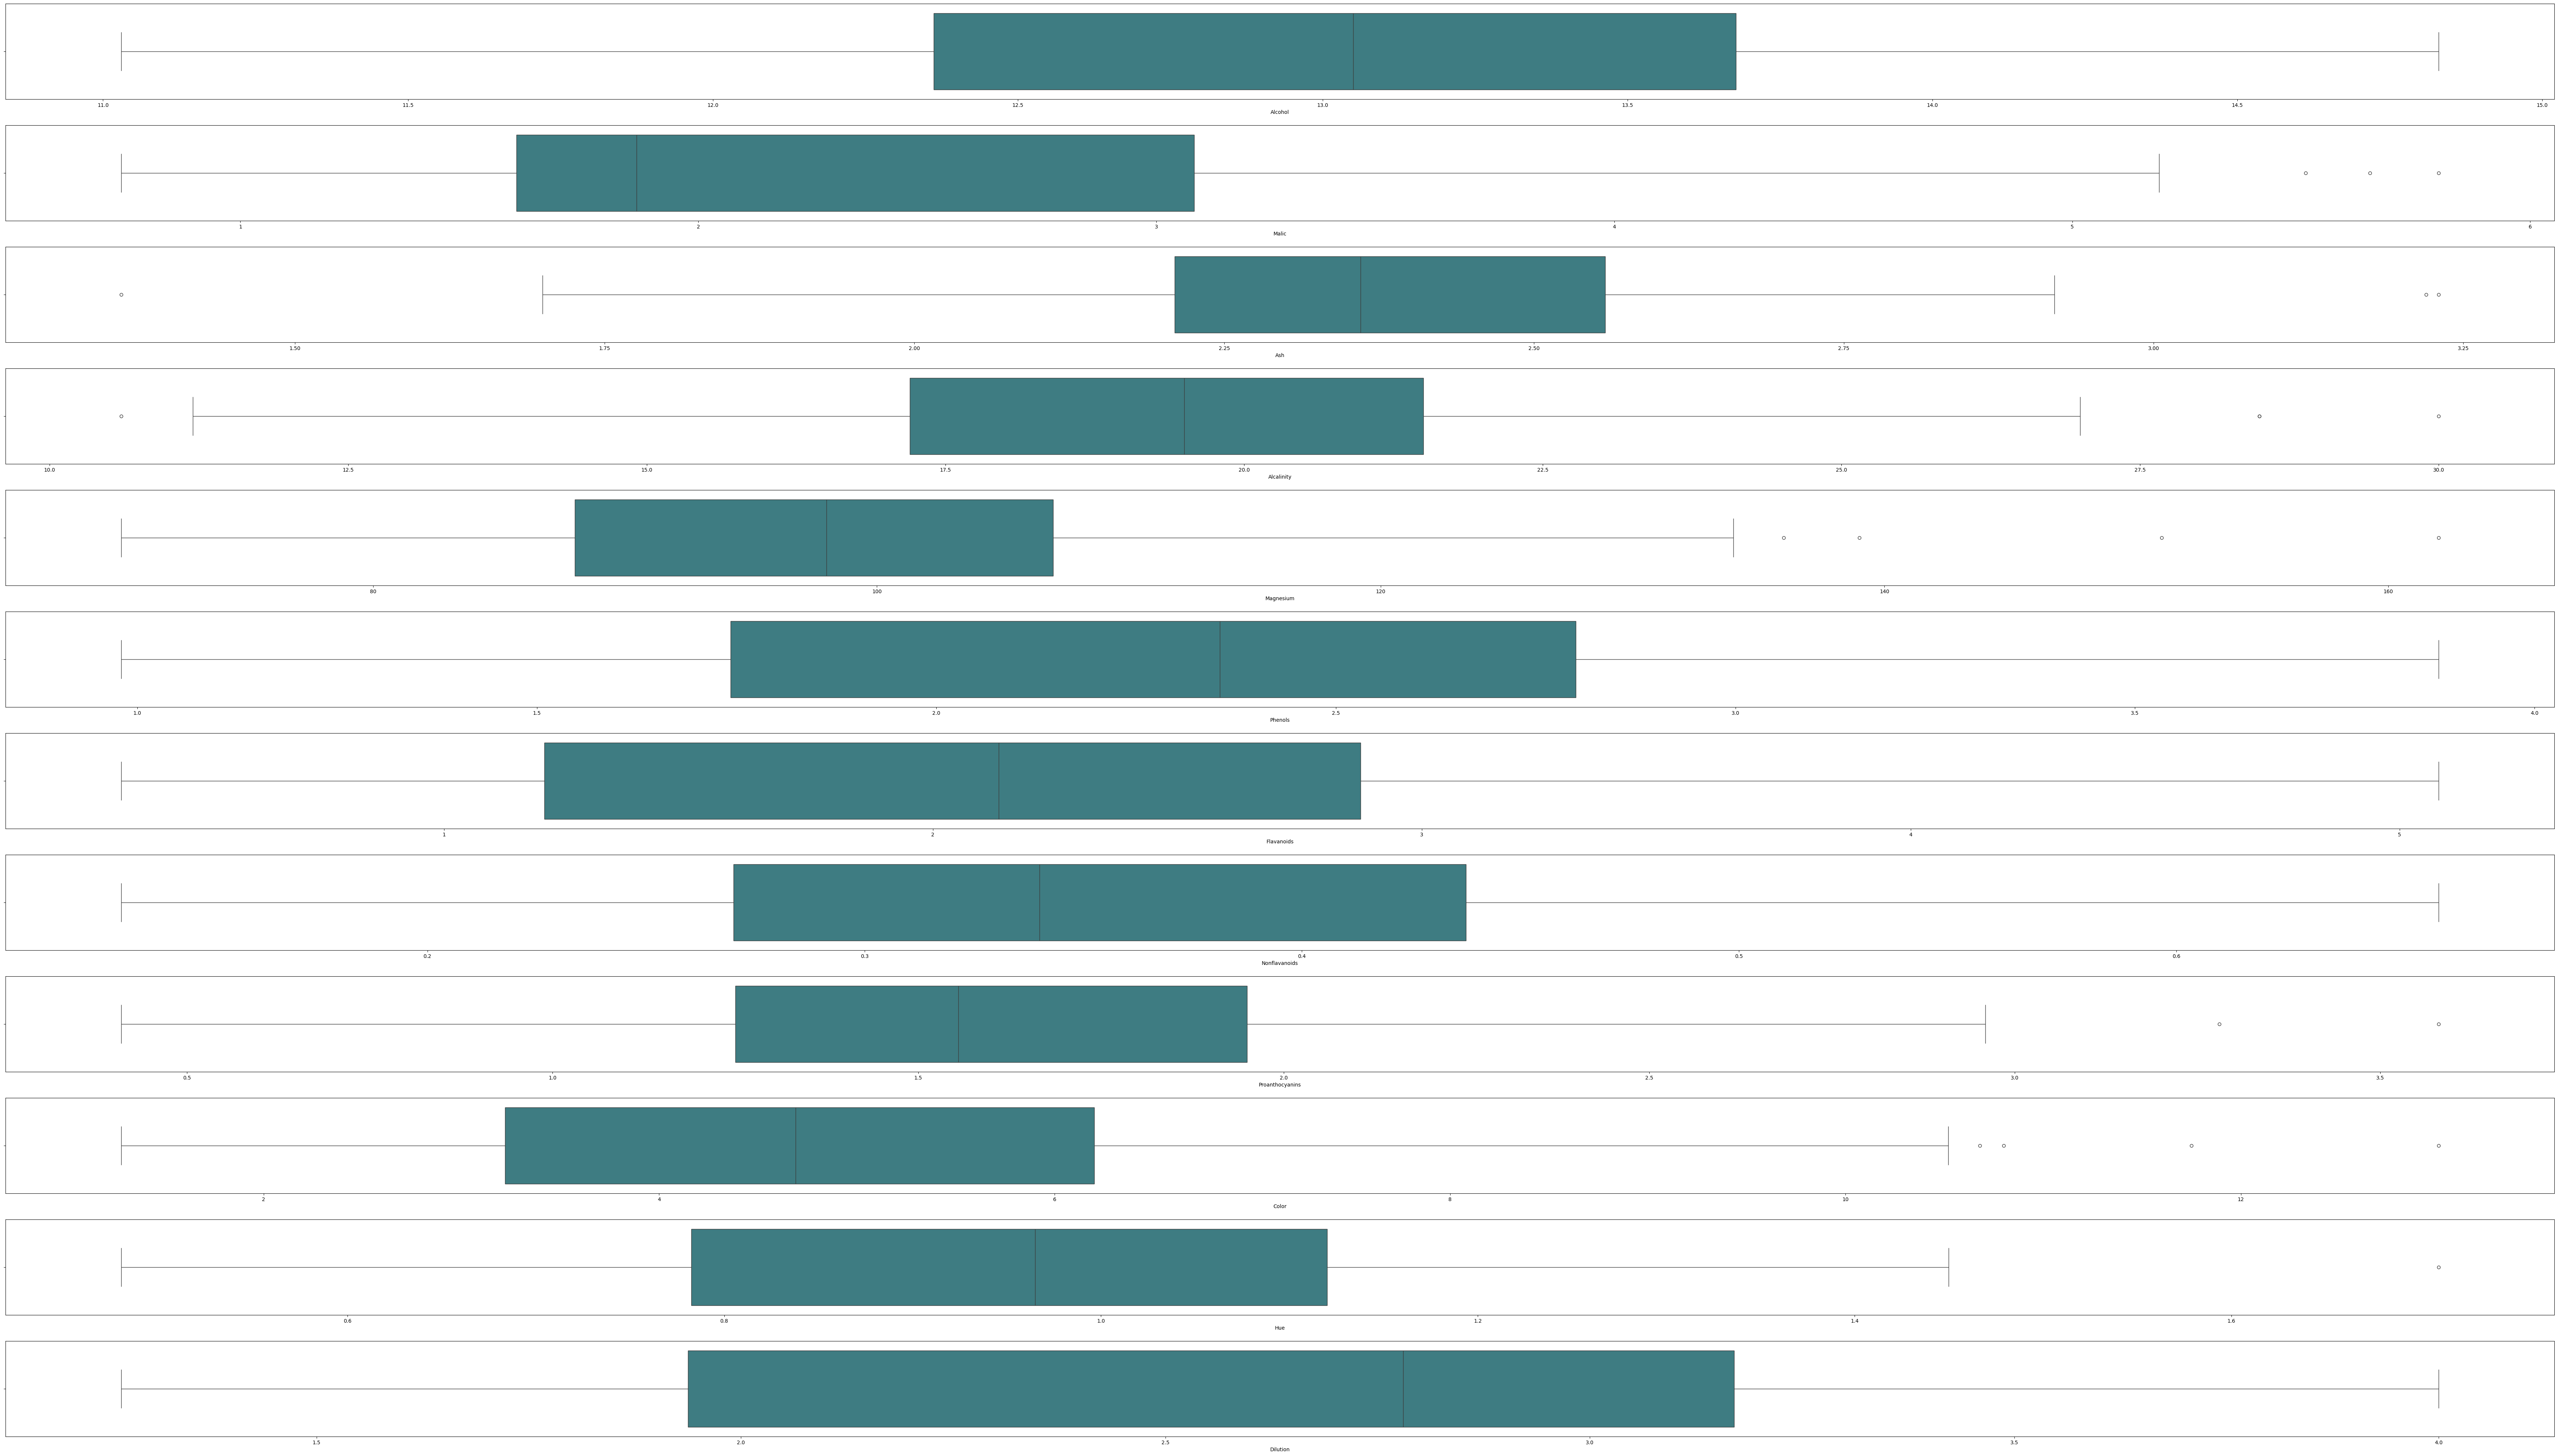

In [40]:
# display the boxplot

import seaborn as sns
import matplotlib.pyplot as plt

bp = x.copy()
fig, axes = plt.subplots(12, 1, figsize=(70,40), sharex=False, sharey=False)
data = ["Alcohol", "Malic", "Ash", "Alcalinity", "Magnesium", "Phenols", "Flavanoids", "Nonflavanoids", "Proanthocyanins", "Color", "Hue", "Dilution", "Proline"]

for i, ax in zip(data, axes):
    sns.boxplot(x=i, data=x, palette='crest', ax=ax)

plt.tight_layout(pad=2.0)
plt.show()


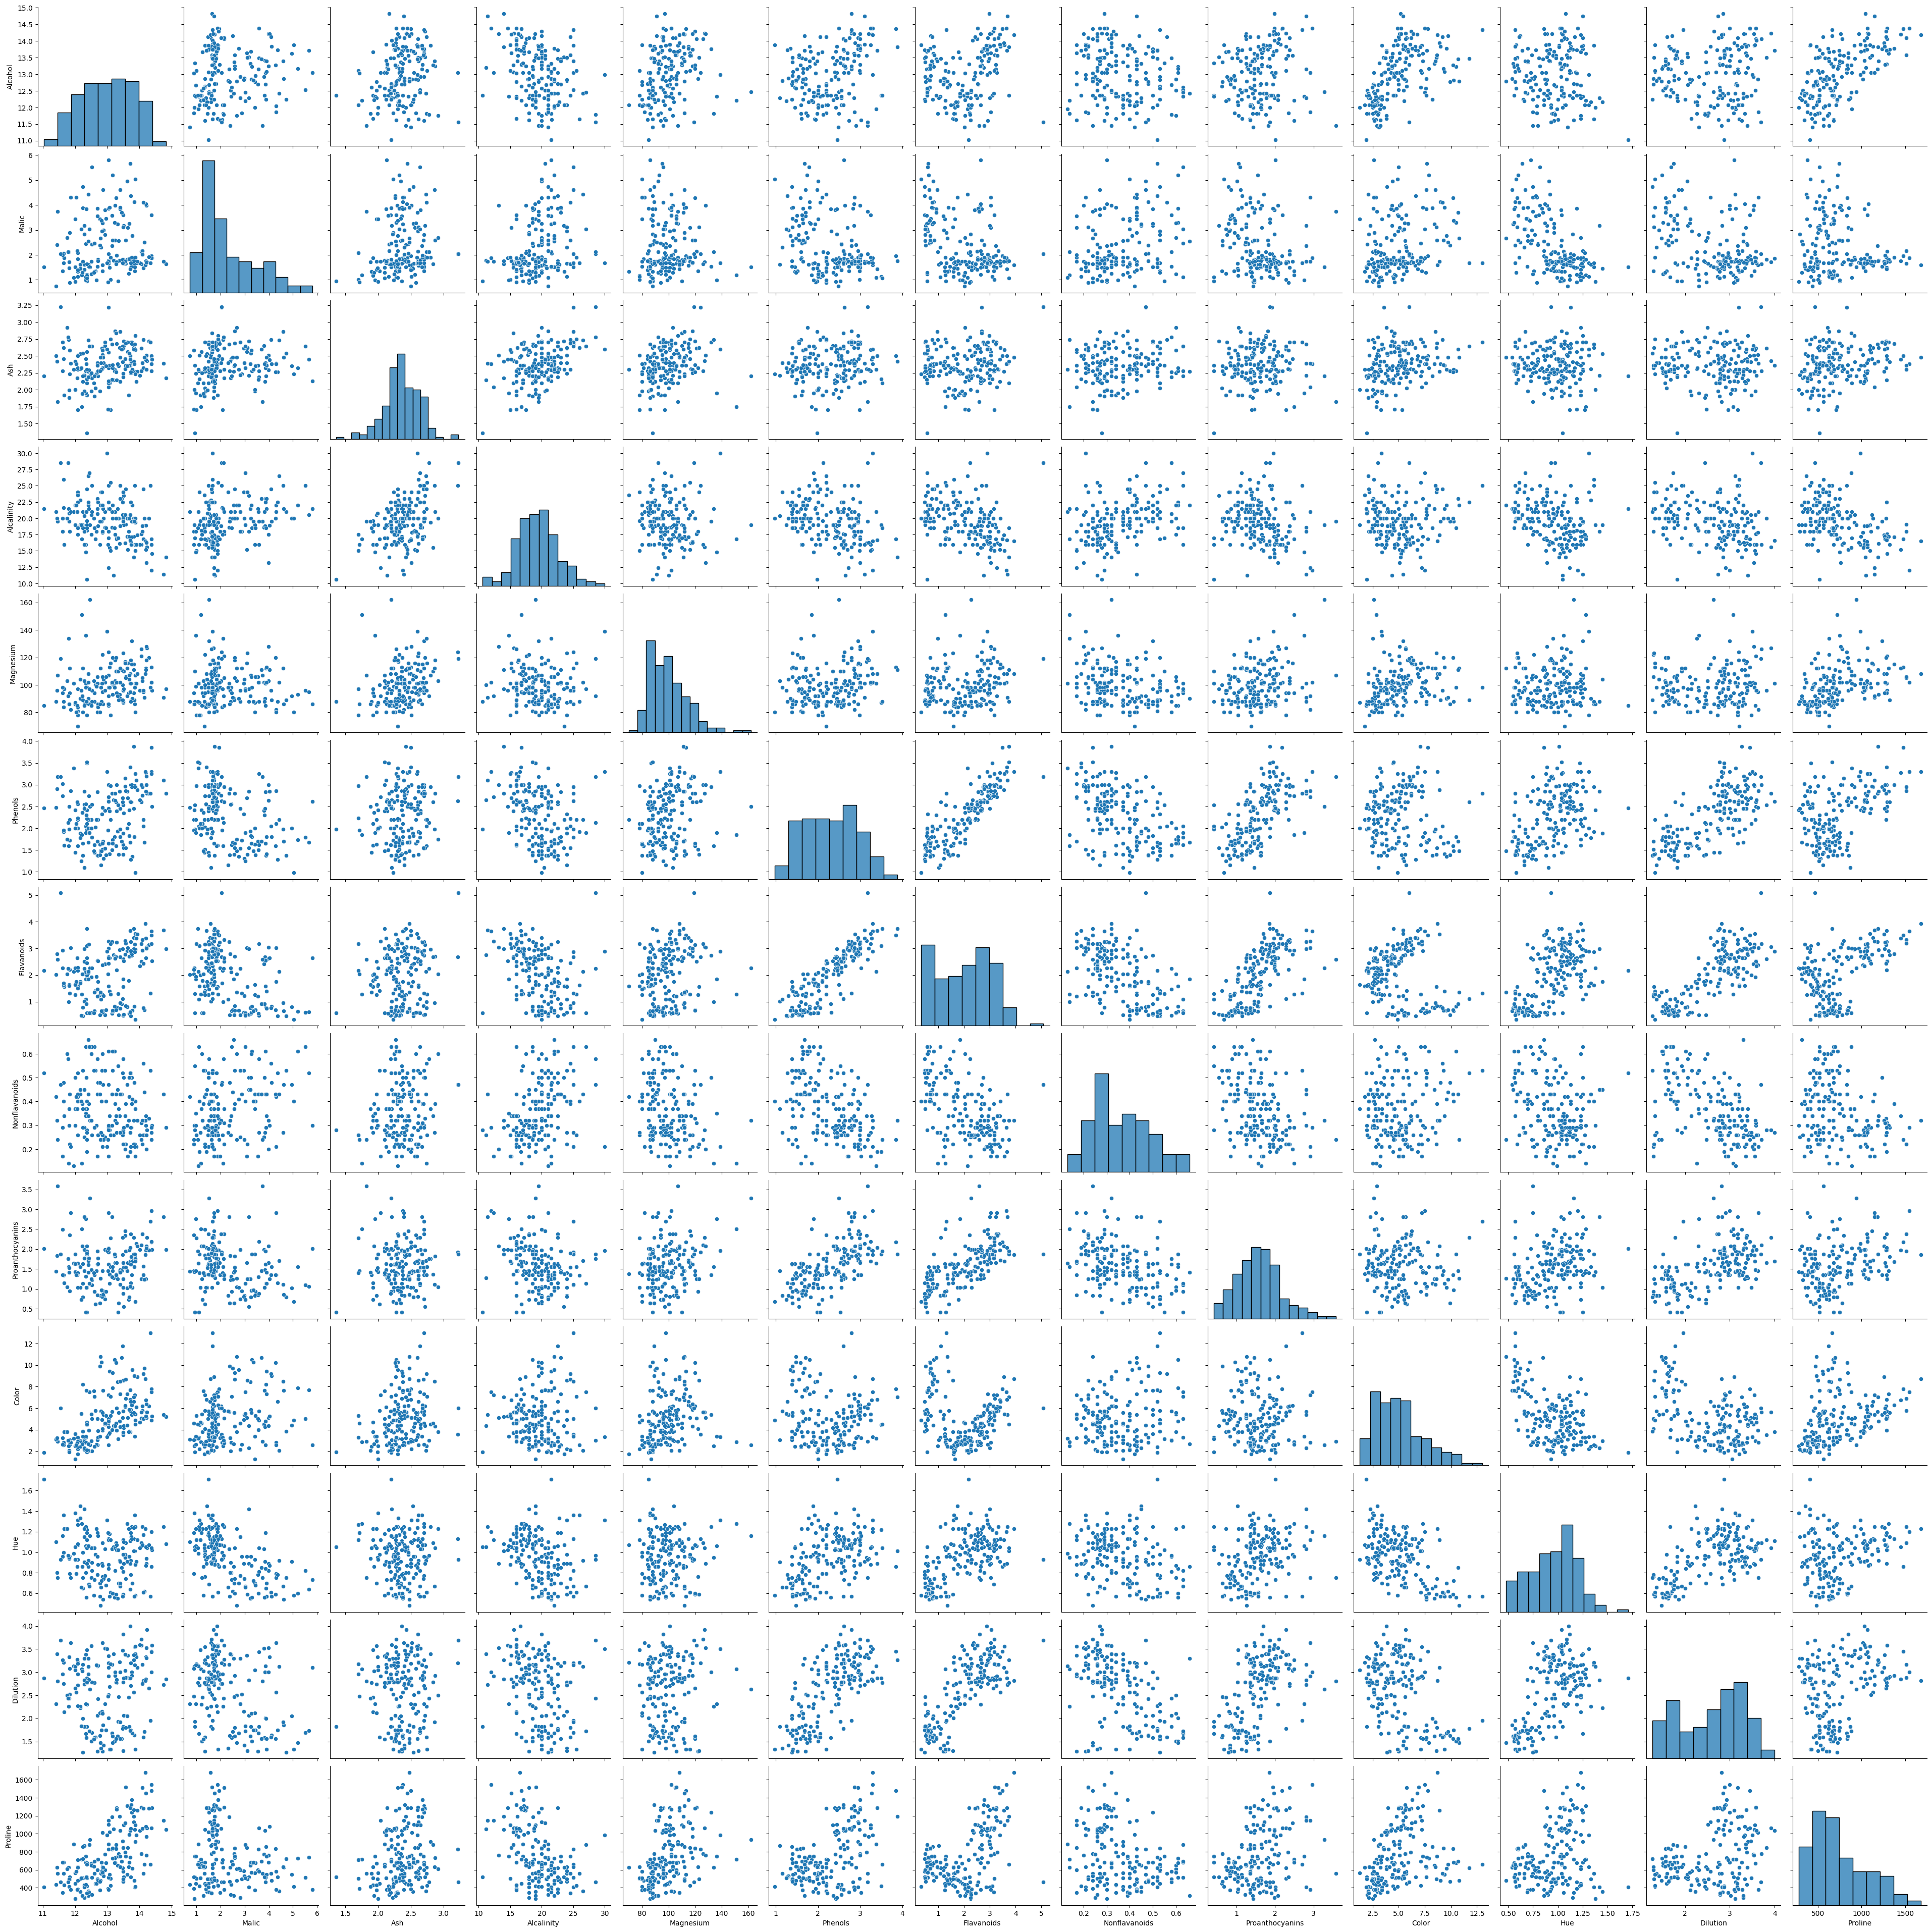

In [41]:
# display the Pairplot

sns.pairplot(x,height = 3)
plt.show()


# Feature Scaling --  Standard Scaler

In [43]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()
stsc = stsc.fit_transform(x)
stsc = pd.DataFrame(stsc)

stsc.columns = list(x)


In [44]:
# display top 5 rows

stsc.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# Principal Component Analysis

In [48]:
# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pc = pca.fit_transform(stsc)



In [50]:
# Explained Variance Ratio

explained_var_ratio = (pca.explained_variance_ratio_)*100
explained_var_ratio = pd.DataFrame(explained_var_ratio)
print("Explained_Variance_Ratio:", explained_var_ratio)





Explained_Variance_Ratio:            0
0  36.198848
1  19.207490
2  11.123631


In [51]:
pd.DataFrame(pc).head()

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [52]:
# PCA

from sklearn.decomposition import PCA

# Assuming SS_X is your standardized data
pca = PCA()
pc = pca.fit_transform(stsc)


In [53]:
# Explained Variance Ratio

explained_var_ratio = (pca.explained_variance_ratio_)*100
explained_var_ratio = pd.DataFrame(explained_var_ratio,columns=["Explained Variance (%)"])
print("Explained_Variance_Ratio:", explained_var_ratio)


Explained_Variance_Ratio:     Explained Variance (%)
0                36.198848
1                19.207490
2                11.123631
3                 7.069030
4                 6.563294
5                 4.935823
6                 4.238679
7                 2.680749
8                 2.222153
9                 1.930019
10                1.736836
11                1.298233
12                0.795215


In [54]:
pd.DataFrame(pc).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


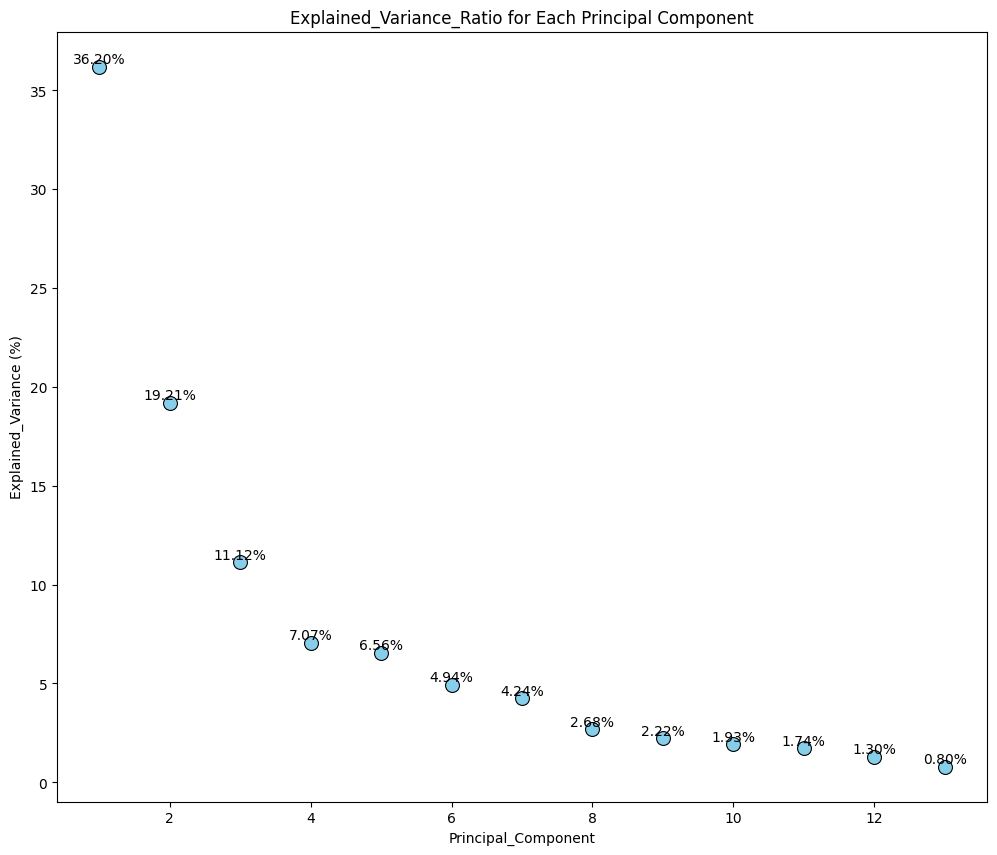

In [55]:
# Visualize the explained variance ratio

plt.figure(figsize=(12,10))
sns.scatterplot(x=range(1, len(explained_var_ratio) + 1), y="Explained Variance (%)", data=explained_var_ratio, s=100, color='skyblue', edgecolor='black')
plt.title('Explained_Variance_Ratio for Each Principal Component')
plt.xlabel('Principal_Component')
plt.ylabel('Explained_Variance (%)')


# Annotate points with the corresponding explained variance
for i, txt in enumerate(explained_var_ratio.values):
    plt.annotate(f'{txt[0]:.2f}%', (i + 1, txt), ha='center', va='bottom')

plt.show()

In [56]:
PC_X=pd.DataFrame(pc[:,0:8])
PC_X.head()

,0,1,2,3,4,5,6,7
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700


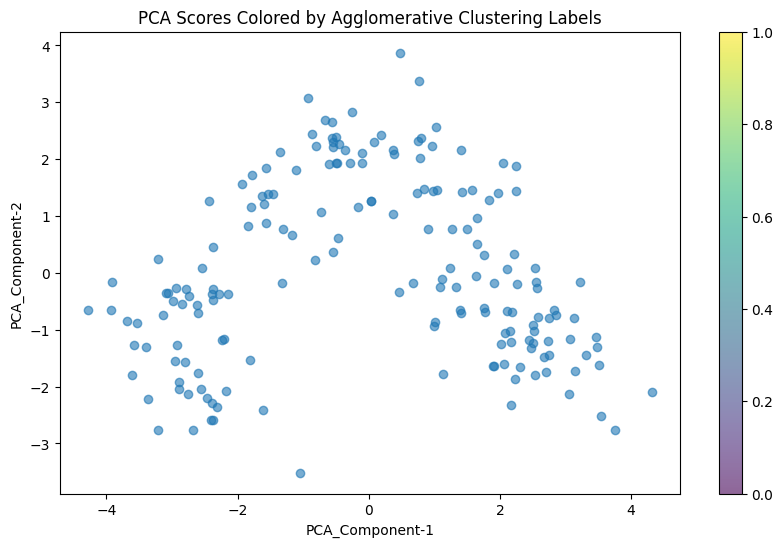

In [57]:
pca_result = pca.fit_transform(PC_X)


# Creating a scatter plot to visualize PCA scores colored by cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 1] ,cmap='viridis', alpha=0.6
)
plt.xlabel('PCA_Component-1')
plt.ylabel('PCA_Component-2')
plt.title('PCA Scores Colored by Agglomerative Clustering Labels')
plt.colorbar(scatter)
plt.show()

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [60]:
y = df["Type"]

In [62]:
# validaton hold-off method


training_accuracy = []
test_accuracy = []

for i in range(1,10,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(PC_X,y, test_size=0.30, random_state=i)
    lr.fit(X_train,Y_train)
    Y_pred_train = lr.predict(X_train)
    Y_pred_test = lr.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))

In [63]:
print("Average trianing accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))

Average trianing accuray 1.0
Average test accuray 0.98


# Agglomeritive Clustering

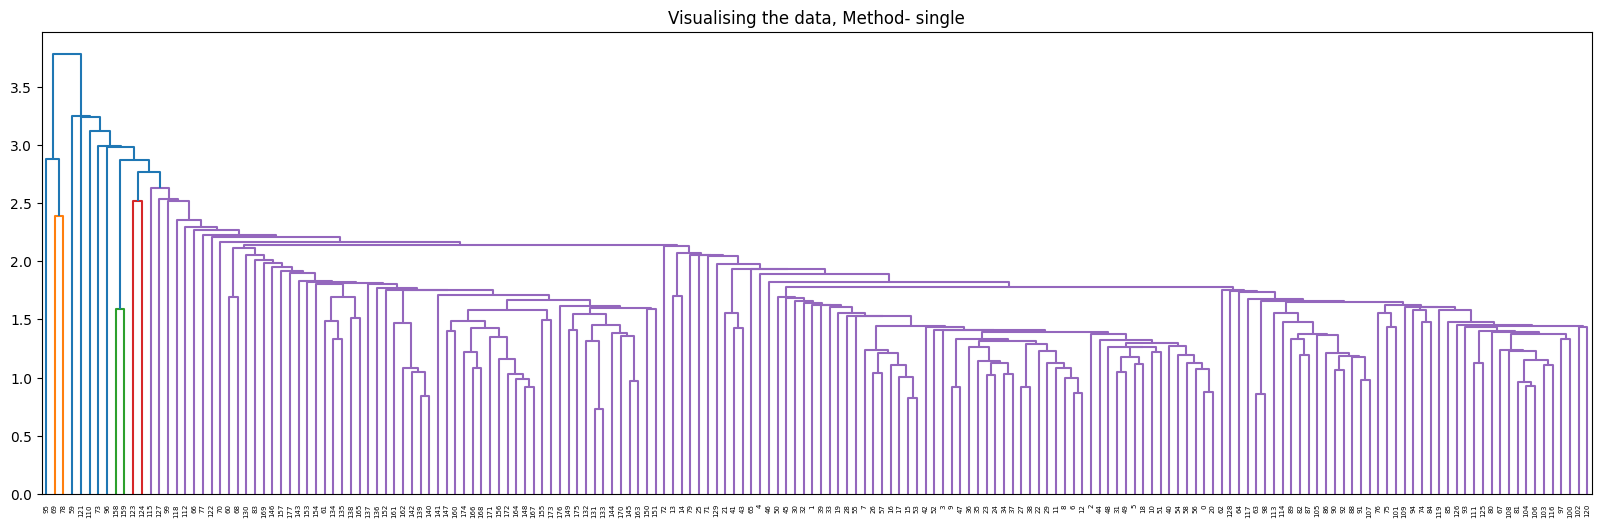

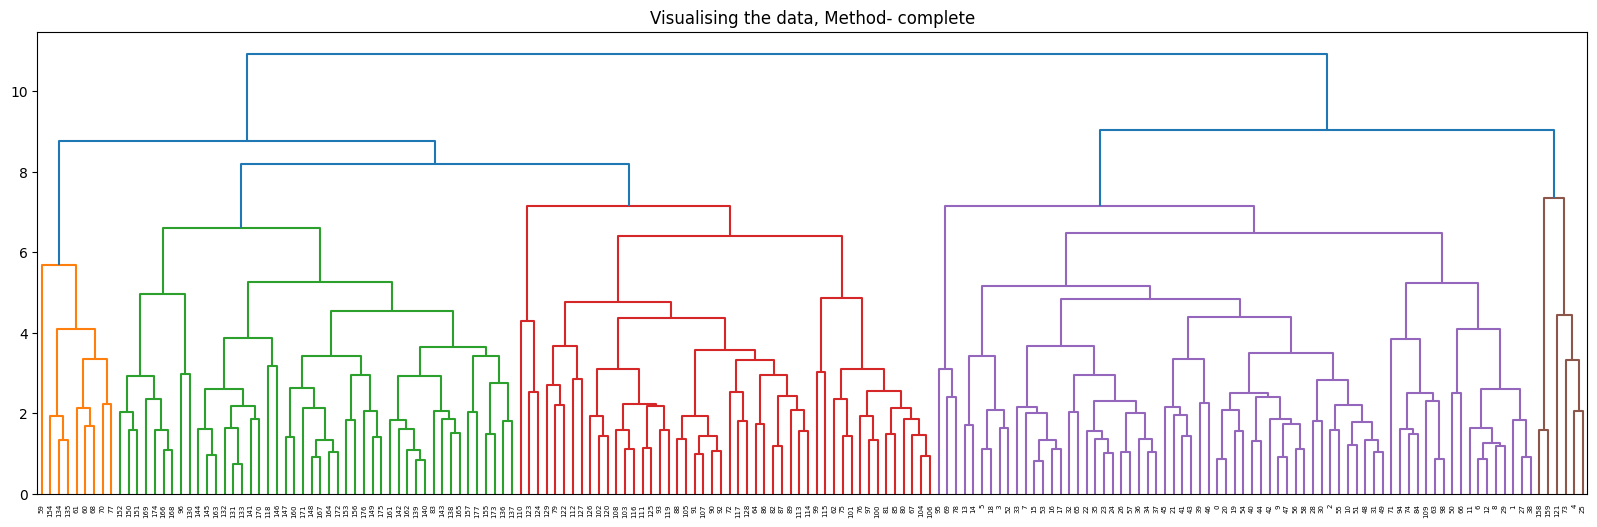

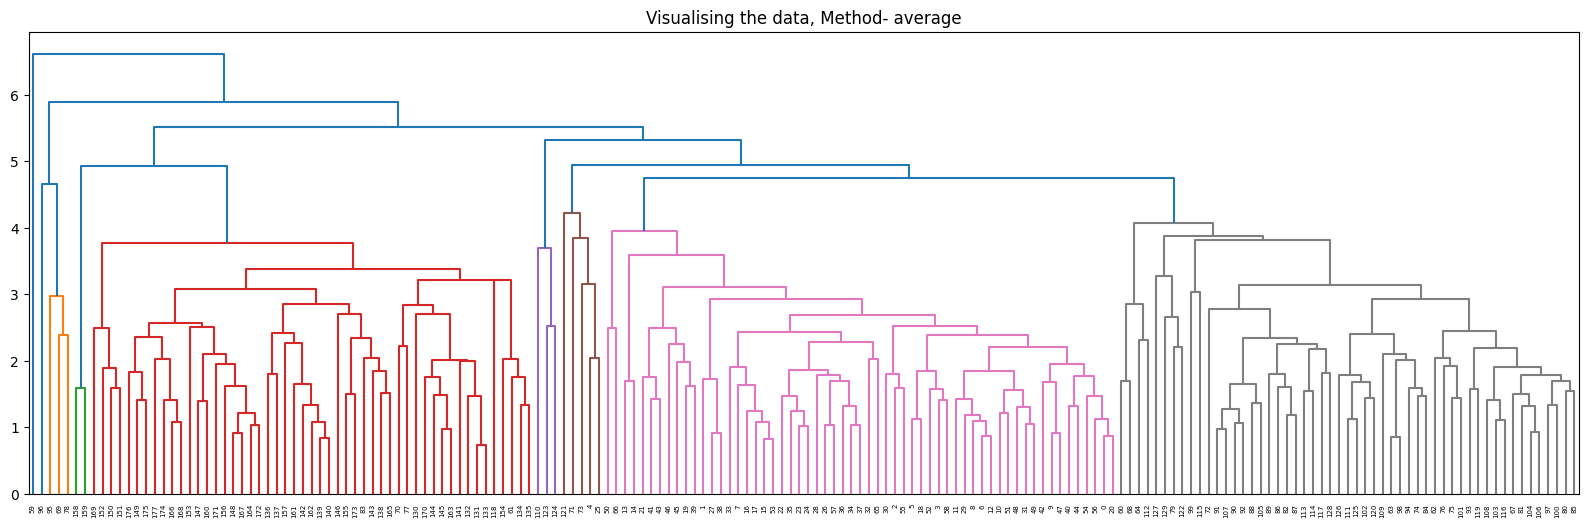

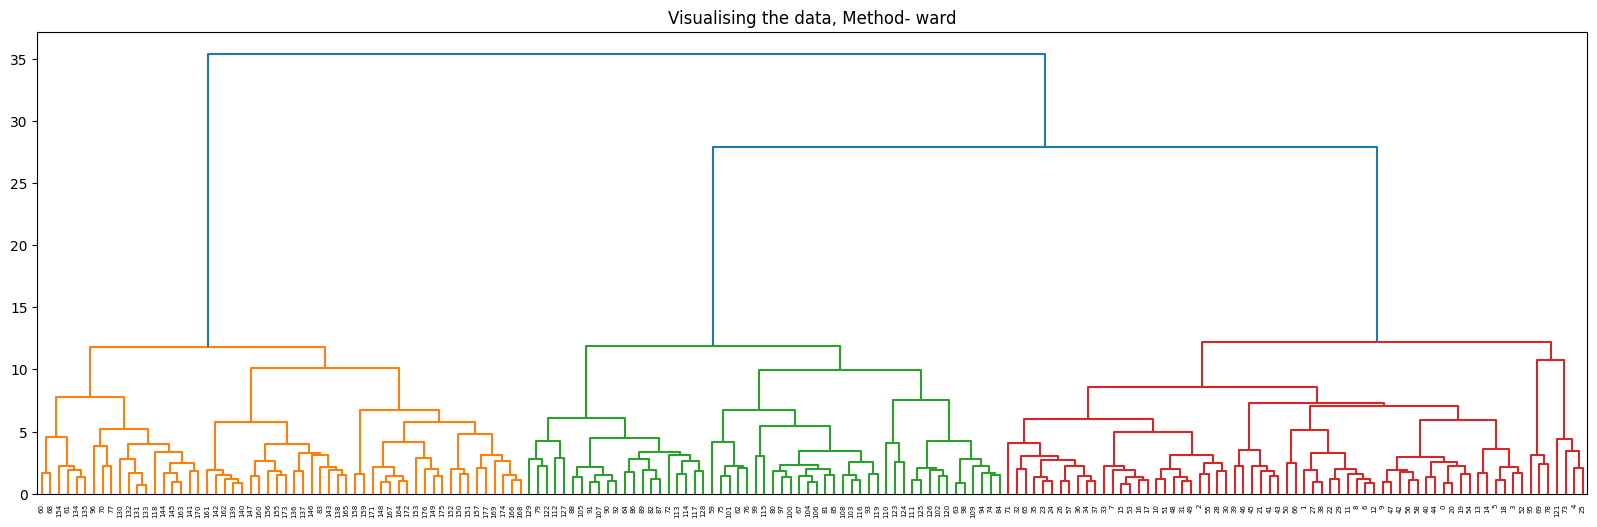

In [65]:

import scipy.cluster.hierarchy as shc

for methods in ['single','complete','average','ward']:
   plt.figure(figsize =(20, 6))
   plt.title('Visualising the data, Method- {}'.format(methods))
   Dendrogram1 = shc.dendrogram(shc.linkage(PC_X, method = methods,optimal_ordering=False))

In [67]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Y = cluster.fit_predict(PC_X)

Y = pd.DataFrame(Y)
print("No of Cluster\n",Y.value_counts())


No of Cluster
 0    67
1    56
2    55
dtype: int64


In [68]:
data1["agglomeritive clusters"] = Y
data1.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,agglomeritive clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [69]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Initialize AgglomerativeClustering with different linkage options
linkage_options = ['ward', 'complete', 'average', 'single']
for linkage in linkage_options:
    cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=linkage)
    Y = cluster.fit_predict(PC_X)
    Y = pd.DataFrame(Y)
    print(f"Linkage: {linkage}")
    print("No. of Samples in Each Cluster\n", Y.value_counts())

    # Store cluster labels in the DataFrame
    data1[f'Agglomerative_clusters_{linkage}'] = Y


Linkage: ward
No. of Samples in Each Cluster
 0    67
1    56
2    55
dtype: int64
Linkage: complete
No. of Samples in Each Cluster
 0    103
2     69
1      6
dtype: int64
Linkage: average
No. of Samples in Each Cluster
 0    173
2      4
1      1
dtype: int64
Linkage: single
No. of Samples in Each Cluster
 0    174
1      3
2      1
dtype: int64


In [70]:
# Represent the dataframe

print(data1.head())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0           0.28             2.29   5.64  1.04      3.92     1065   
1           0.26             1.28   4.38  1.05      3.40     1050   
2           0.30             2.81   5.68  1.03      3.17     1185   
3           0.24             2.18   7.80  0.86      3.45     1480   
4           0.39             1.82   4.32  1.04      2.93      735   

   agglomeritive clusters  Agglomerative_clusters_ward  \
0                       0                            0   
1     

# K-Means Clustering

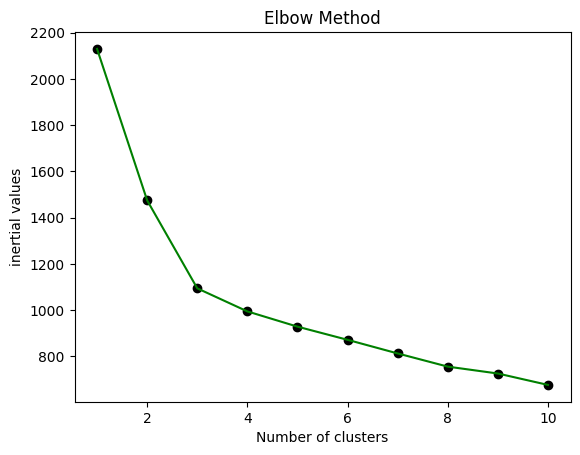

In [72]:
from sklearn.cluster import KMeans
KMeans()

clust = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=10)
    kmeans.fit(PC_X)
    clust.append(kmeans.inertia_)

plt.plot(range(1,11),clust,color="green")
plt.scatter(range(1, 11), clust,color="black")
plt.xlim()
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertial values')
plt.show()

In [73]:
# K-Means Cluster using K=4

kmeans = KMeans(n_clusters=3,random_state=11)
Kmeans = kmeans.fit(PC_X)


In [74]:
# Predicting the clusters
cluster_labels = kmeans.predict(PC_X)
cluster_centers = kmeans.cluster_centers_

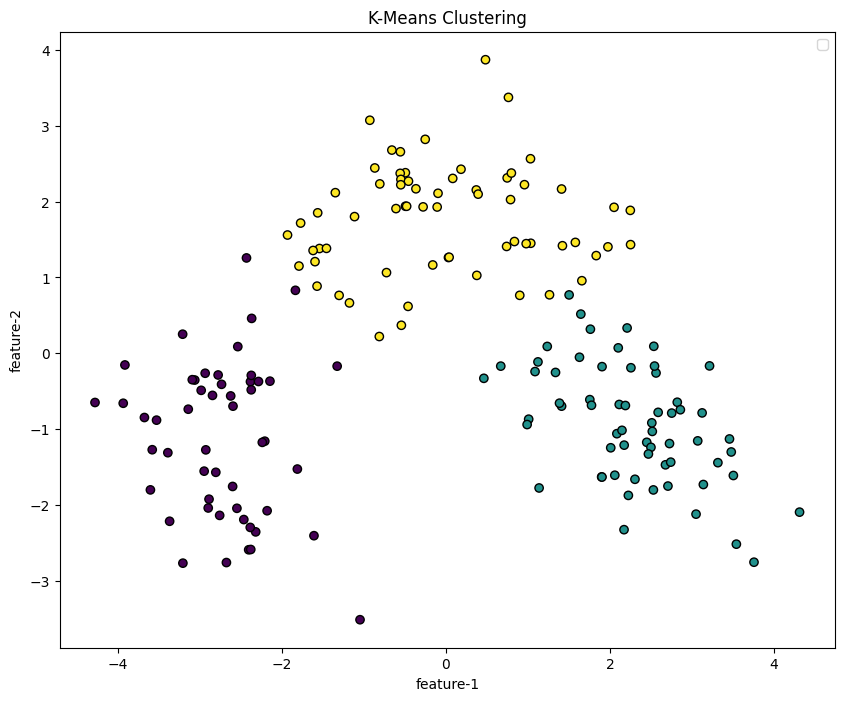

In [75]:
# Using scatterplot to visualize the K-Means clustering results

plt.figure(figsize=(10,8))
plt.scatter(PC_X.iloc[:,0], PC_X.iloc[:,1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering')
plt.xlabel('feature-1')
plt.ylabel('feature-2')
plt.legend()
plt.show()

In [76]:
cluster_labels = pd.DataFrame(cluster_labels)
cluster_labels.value_counts()
data2['Kmeans_clusters'] = cluster_labels
data2.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


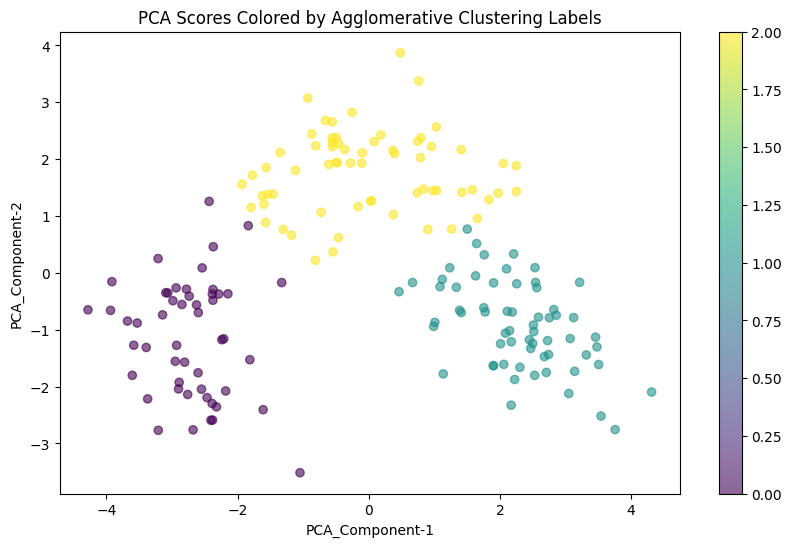

In [78]:
pca_result = pca.fit_transform(PC_X)

# Create a scatter plot to visualize PCA scores colored by cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6
)
plt.xlabel('PCA_Component-1')
plt.ylabel('PCA_Component-2')
plt.title('PCA Scores Colored by Agglomerative Clustering Labels')
plt.colorbar(scatter)
plt.show()